# Perform grid search on model hyperparameters

All Rights Reserved © <a href="http://www.louisdorard.com" style="color: #6D00FF;">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/ML_icon.png">

## Load data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("data/boston-housing.csv")
target_column = 'medv'
features = data.drop(target_column, axis=1)
outputs = data[target_column]
X = features.values.astype(float)
y = outputs.values

## Grid search from scratch

Let's implement a procedure to tune 1 hyperparameter — here, `max_features` in Random Forest.

In [2]:
FOLDS = 10

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from numpy import arange
params = arange(0.1, 1.0, 0.1)
means = []
stdevs = []
for i in params:
    s = cross_val_score(RandomForestRegressor(n_estimators=10, max_features=i), X, y, scoring="r2", cv=FOLDS, verbose=0)
    m = s.mean()
    st = s.std()
    means.append(m)
    stdevs.append(st)
    print("Param " + str(i) + ": " + str(m) + " +/- " + str(st))

Param 0.1: 0.274724228811946 +/- 0.23066526833582152
Param 0.2: 0.2707003354538555 +/- 0.5012217043360916
Param 0.30000000000000004: 0.3907819798648589 +/- 0.36503216281701323
Param 0.4: 0.25318589123661794 +/- 0.7007627925773869
Param 0.5: 0.4492753003467184 +/- 0.2752656367120116
Param 0.6: 0.5000181380779634 +/- 0.257968511117866
Param 0.7000000000000001: 0.37797884331572024 +/- 0.5035311789554552
Param 0.8: 0.43948254914675616 +/- 0.38283949273887424
Param 0.9: 0.3969016078075769 +/- 0.4561505195068894


## Grid search with scikit's `GridSearchCV`

### Example with 1 hyperparameter

Define a grid search task:

In [3]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(n_estimators=10),
                           {"max_features": params},
                           scoring="r2",
                           cv=FOLDS, # cv is the number of folds; smaller values will make the evaluation quicker; recommended values are between 5 and 10
                           n_jobs=-1,
                           verbose=1)

Run the search:

In [4]:
grid_search.fit(X, y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

Plot grid search results:

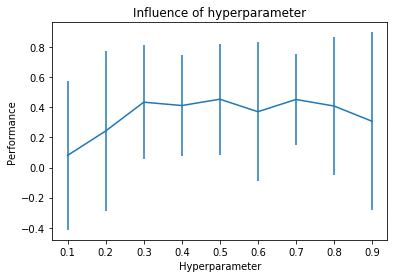

In [5]:
%matplotlib inline
from matplotlib import pyplot
pyplot.errorbar(params, grid_search.cv_results_['mean_test_score'], yerr=grid_search.cv_results_['std_test_score'])
pyplot.title("Influence of hyperparameter")
pyplot.xlabel("Hyperparameter")
pyplot.ylabel("Performance")
pyplot.show()

### Example with 2 hyperparameters

In [6]:
grid = {"max_depth": [3, 9, None],
        "max_features": [0.5, 0.75]}
grid_search = GridSearchCV(RandomForestRegressor(n_estimators=10),
                           grid,
                           scoring="r2",
                           cv=FOLDS,
                           n_jobs=-1)

Run the search to find the best combination of hyperparameters:

In [7]:
grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 9, None], 'max_features': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Create model from `X` and `y` using the best hyperparameters found during this search:

In [8]:
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X, y)
y_pred = model.predict(X) # bit stupid - don't do this normally!!

### Example with `KFold`

In [9]:
from sklearn.model_selection import KFold
SEED = 8
kfold = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
grid_search = GridSearchCV(RandomForestRegressor(n_estimators=10),
                           grid,
                           scoring="r2",
                           cv=kfold,
                           n_jobs=-1)

In [10]:
grid_search.fit(X, y)
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)